## Assignments: Astronomy and Astrophysics -- I
These are codes for certain problems of A&A-I taken by R.Srianand at IUCAA for the graduate school 2018

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from astropy.io import fits

### Question: 1

Need to convert RA and Dec to degrees, and need to precess the coordinates.

In [28]:
def RA_conv(ra):
    return ra[0]*15+ra[1]*15/60+ra[2]*15/3600
def Dec_conv(dc):
    return dc[0]+dc[1]/60+dc[2]/3600
def M(T):
    return 1.2812323*T+0.0003879*np.power(T,2)+0.0000101*np.power(T,3)
def N(T):
    return 0.556753*T - 0.0001185*np.power(T,2) - 0.0000116*np.power(T,3)
def Precessor(ra,dc,t):
    #Does for J1950
    T = (t-1950.0)/100.0
    da = M(T)+N(T)*np.sin(ra)*np.tan(dc)
    ddec = N(T)*np.cos(ra)
    return [da,ddec]

In [29]:
ra,dec = Precessor(216.575*np.pi/180,-62.4833*np.pi/180,1990.0)
print ra
print dec

0.7672699009510279
-0.17883051173205095


In [38]:
#Find RA and Dec in degrees.
print RA_conv([21.0,57.0,35.60])
print Dec_conv([0,58.0,16.6])

329.398333333
0.971277777778


### Question: 2
We need to compute the fluxes given magnitudes in AB system, and then check our plots vis-a-vis the given files

In [4]:
def flux_gen(m,lam):
    m=np.asarray(m)
    b=np.asarray([1.4,0.9,1.2,1.8,7.4])*np.power(10.0,-10)
    f_f_0 = 2*b*np.sinh(-m*np.log(10.0)/2.5-np.log(b))
    return f_f_0*3.6*3*np.power(10.0,-2)/(lam*lam)
def df_gen(f_f_0,m,dm,lam):
    b=np.asarray([1.4,0.9,1.2,1.8,7.4])*np.power(10.0,-10)
    arg = -m*np.log(10.0)/2.5-np.log(b)
    df = f_f_0*np.cosh(arg)*np.log(10)*dm/(2.5*np.sinh(arg))
    return df*3.6*3*np.power(10.0,-2)/(lam*lam)

In [5]:
filt_lam = np.asarray([3543,4770,6231,7625,9134])
Object_prop = {'1':{'fits':'Obj1.fits','m':np.asarray([20.19,18.21,17.20,16.73,16.35]),'dm':np.asarray([0.08,0.01,0.01,0.01,0.01])}}
Object_prop['2'] = {'fits':'Obj2.fits','m':np.asarray([19.58,18.66,18.15,17.83,17.72]),'dm':np.asarray([0.04,0.01,0.01,0.01,0.01])}
Object_prop['3'] = {'fits':'Obj3.fits','m':np.asarray([19.45,19.42,19.40,19.09,18.93]),'dm':np.asarray([0.03,0.01,0.01,0.01,0.04])}
object_id = '1' #Must be 1, 2, 3
obj1_flux = flux_gen(Object_prop[object_id]['m'],filt_lam)
ob_err = df_gen(obj1_flux,Object_prop[object_id]['m'],Object_prop[object_id]['dm'],filt_lam)
obj1_raw = fits.open(Object_prop[object_id]['fits'])
obj1_obs = obj1_raw[1].data['flux']
obj1_lam = obj1_raw[1].data['loglam']
print obj1_flux
#print obj1_raw[1].header
#Printing header only to look at the scale of f_lambda

[7.22038976e-17 2.46823040e-16 3.66697453e-16 3.77523264e-16
 3.73335150e-16]


In [339]:
o1 = np.asarray([np.power(10.0,obj1_lam),obj1_obs])
np.savetxt("Object"+str(object_id)+".csv", o1, delimiter=",")

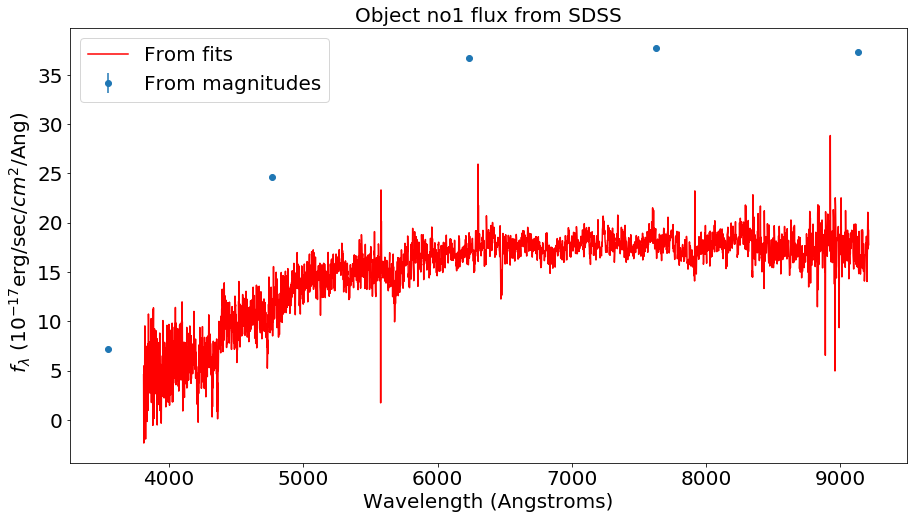

In [331]:
plt.figure(figsize=(15,8))
plt.plot(np.power(10.0,obj1_lam),obj1_obs,'r',label = 'From fits')
plt.errorbar(filt_lam,obj1_flux*10**17,yerr=ob_err*10**17,fmt='o',label = 'From magnitudes')
plt.title('Object no'+str(object_id)+' flux from SDSS', fontsize = 20)
plt.xlabel('Wavelength (Angstroms)',fontsize = 20)
plt.ylabel(' $f_{\lambda}$ ($10^{-17}$erg/sec/$cm^2$/Ang)',fontsize = 20)
plt.legend(prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.savefig('Object_'+str(object_id)+'.eps',fmt='eps',dpi=500)


### Question: 15
Plotting the modified spectrum:
1. Red-shifted at the H1 cloud.
2. Thomson and Bound-free scattering at the cloud.
3. Red-shifted from cloud to us.

In [7]:
def L(lam):
    #Intrinsic luminosity
    return np.power(10.0,43)*3000/lam
def tau(lam):
    return 0.476*np.power(lam/912.0,3)*(lam<=912.0) + 4.2*np.power(10.0,-8.0)*(lam>912.0)
def Mod_spec(L,lam):
    return L*np.exp(-tau(lam))

In [12]:
lam_earth = np.arange(400,6000,10.0)
lam_qso = lam_earth/4 #z_qso = 3
lam_H1 = lam_earth/3 #z_H1 = 2
L_intrinsic = [L(lam_qso),lam_qso] #Intrinsic luminosity
L_qso_earth = [L_intrinsic[0]/(4*np.pi*84.855*9.46*np.power(10.0,26)),lam_earth]
L_H1 = [Mod_spec(np.ones(lam_earth.shape),lam_H1),lam_H1]
L_H1_earth = [L_H1[0]/(4*np.pi*51.59*9.46*np.power(10.0,26)),lam_earth]
L_received = [L_H1_earth[0]*L_qso_earth[0],lam_earth]


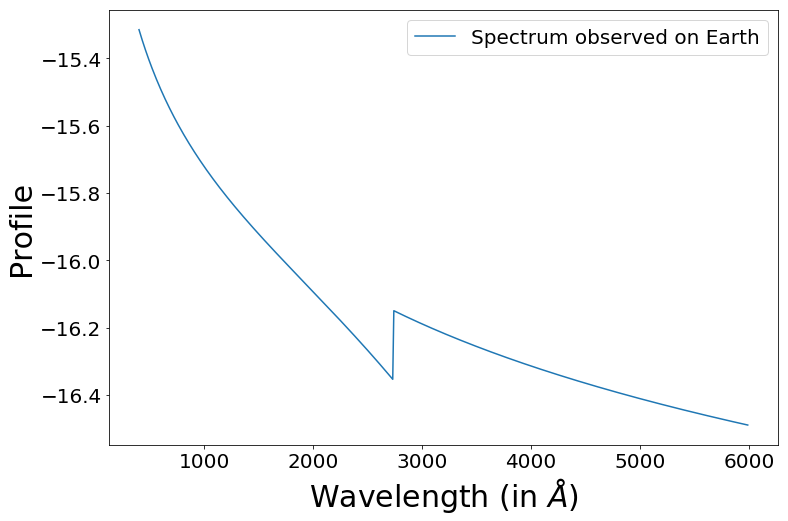

In [13]:
plt.figure(figsize = (12,8))
#plt.plot(L_intrinsic[1],np.log10(L_intrinsic[0]),label = 'Intrinsic luminosity')
#plt.plot(L_qso_earth[1],np.log10(L_qso_earth[0]),label='Spectrum from QSO alone at earth')
#plt.plot(L_H1[1],L_H1[0],label='$e^{- \\tau_{\lambda}}$ profile at the H1 cloud')
plt.plot(L_received[1],np.log10(L_received[0]),label='Spectrum observed on Earth')
#plt.xlim(10,4000)
plt.legend(prop = {'size':20})
plt.xlabel('Wavelength (in $\AA$)',fontsize=30)
plt.ylabel('Profile',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.savefig('Earth.eps',fmt='eps',dpi=500)